In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/300/Downloads/retail_sales_dataset.csv")

# Preview data
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.shape


(1000, 9)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May


In [9]:
bins = [0, 18, 25, 35, 45, 55, 65]
labels = ['<18', '18–25', '26–35', '36–45', '46–55', '56–65']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, ordered=True)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_Name,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November,26–35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February,26–35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January,46–55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May,36–45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May,26–35


In [10]:
df['Calculated_Total'] = df['Quantity'] * df['Price per Unit']

(df['Calculated_Total'] == df['Total Amount']).value_counts()


True    1000
Name: count, dtype: int64

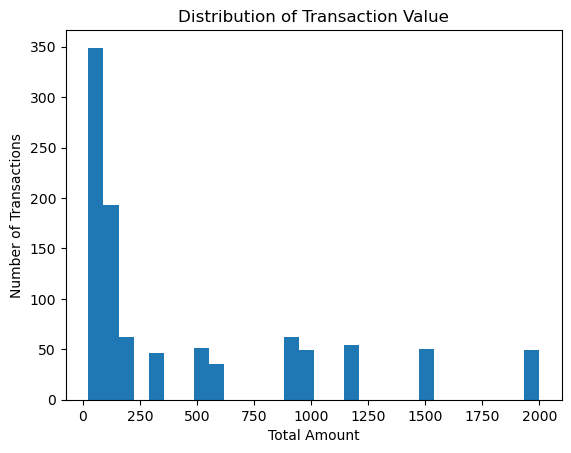

In [11]:
plt.figure()
plt.hist(df['Total Amount'], bins=30)
plt.xlabel('Total Amount')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Value')
plt.show()


Text(0.5, 0, 'Month')

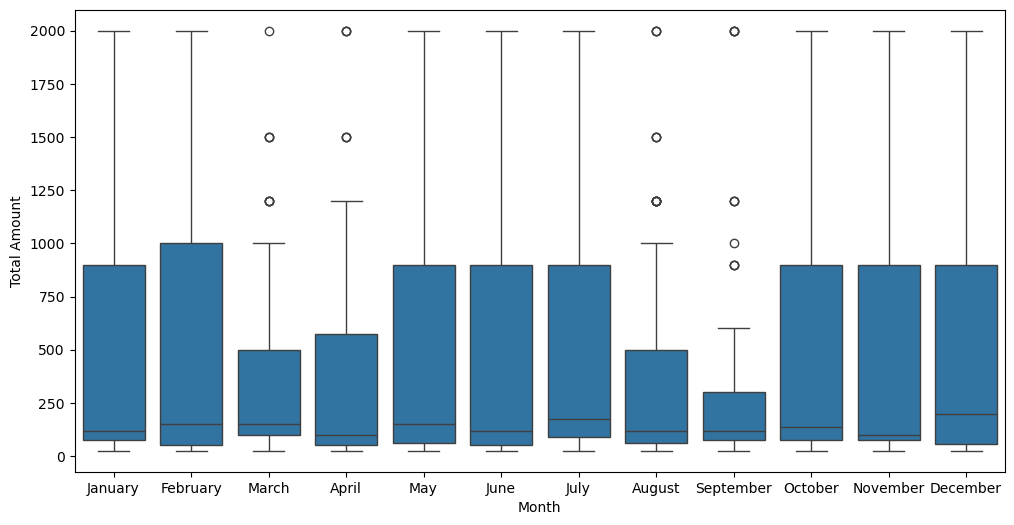

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Name', y='Total Amount', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month')     

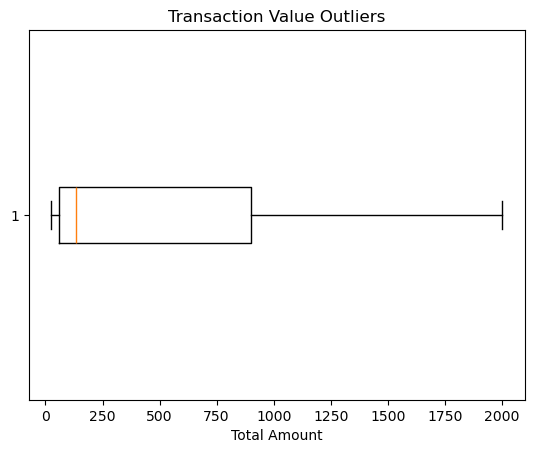

In [13]:
plt.figure()
plt.boxplot(df['Total Amount'], vert=False)
plt.xlabel('Total Amount')
plt.title('Transaction Value Outliers')
plt.show()


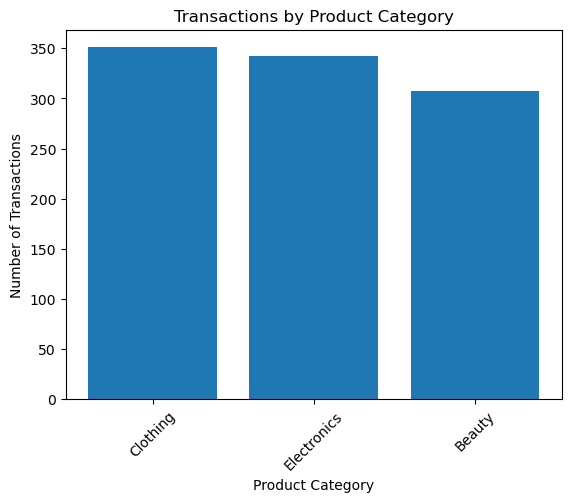

In [14]:
category_counts = df['Product Category'].value_counts()

plt.figure()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Product Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
category_counts 

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x2be23b11a90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

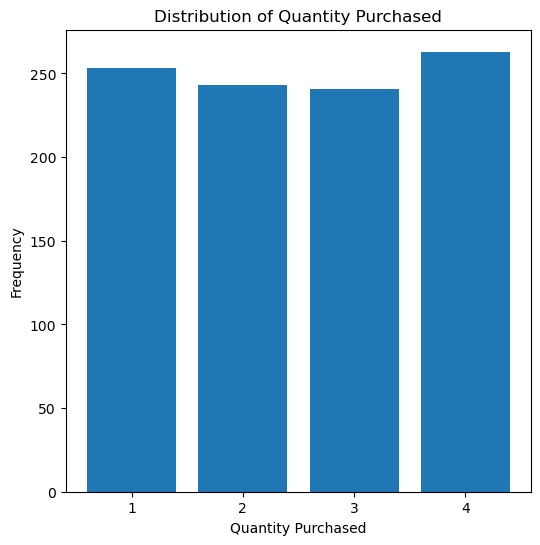

In [16]:
plt.figure(figsize=(6, 6))
plt.hist(df['Quantity'], bins=[0.5, 1.5, 2.5, 3.5, 4.5], rwidth=0.8)
plt.xlabel('Quantity Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Purchased')
plt.xticks([1, 2, 3, 4])

In [17]:
quantity_counts = df['Quantity'].value_counts().sort_index()
quantity_counts

Quantity
1    253
2    243
3    241
4    263
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers')

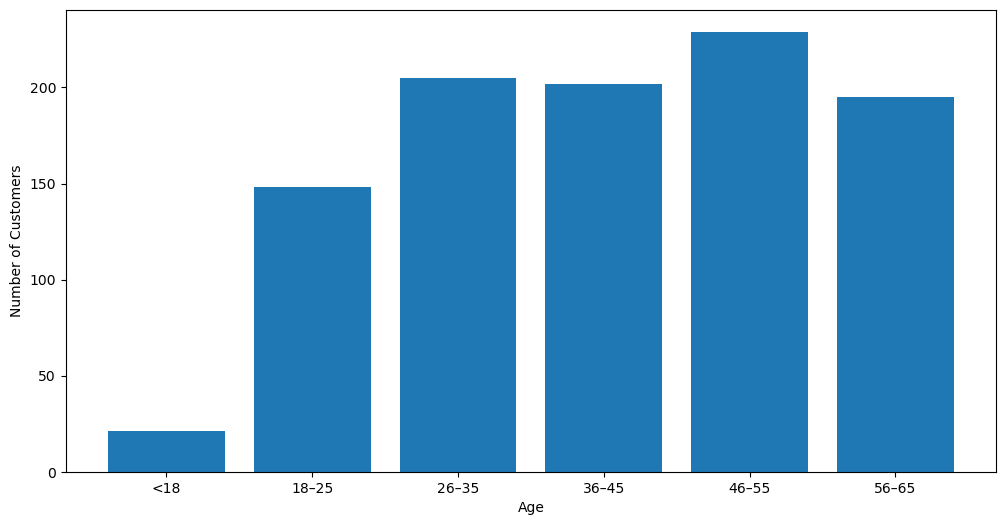

In [18]:
plt.figure(figsize=(12, 6))
counts = df['Age_Group'].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values, width=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Customers')

(np.float64(-1.0999995199966508),
 np.float64(1.0999948782492788),
 np.float64(-1.0999994973736358),
 np.float64(1.0999973415582085))

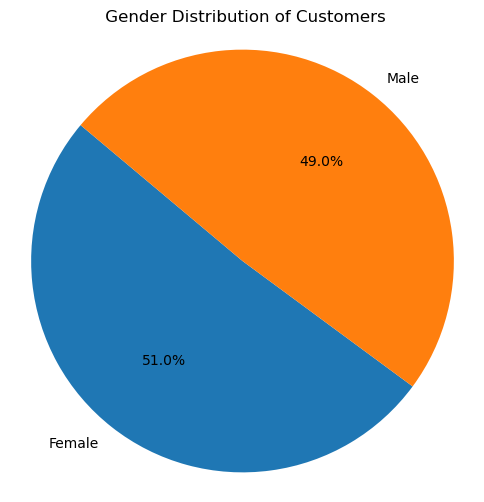

In [19]:
gender_counts = df['Gender'].value_counts() 
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(' Gender Distribution of Customers')
plt.axis('equal')

In [20]:
total_revenue = df['Total Amount'].sum()
avg_transaction = df['Total Amount'].mean()
total_transactions = df.shape[0]
avg_quantity = df['Quantity'].mean()

key_sales_metrics = pd.DataFrame({
   'Metric': ['Total Revenue', 'Average Transaction Value', 'Total Transactions', 'Average Quantity per Transaction'],
    'Value': [total_revenue, avg_transaction, total_transactions, avg_quantity]
})

key_sales_metrics


,Metric,Value
0,Total Revenue,456000.000
1,Average Transaction Value,456.000
2,Total Transactions,1000.000
3,Average Quantity per Transaction,2.514


In [21]:
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)
revenue_by_category

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


Text(0.5, 1.0, 'Total Revenue by Product Category')

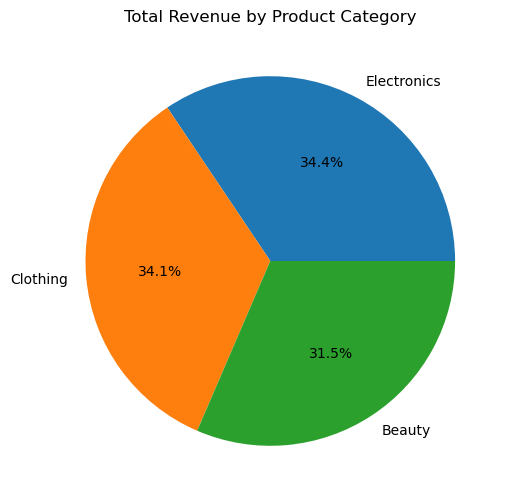

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(x='Total Amount', labels='Product Category', autopct='%1.1f%%', data=revenue_by_category)
plt.title('Total Revenue by Product Category')

Text(0, 0.5, 'Average Transaction Value')

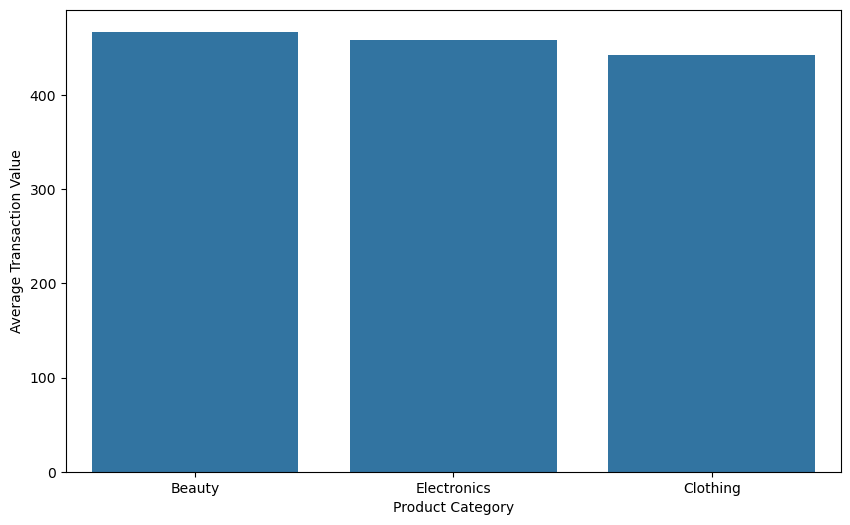

In [23]:
# compute average transaction value per product category
avg_transaction_by_category = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)
avg_transaction_by_category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_by_category.index, y=avg_transaction_by_category.values)  
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value')

In [24]:
top_transactions = df.sort_values('Total Amount', ascending=False).head(10)
top_transactions[['Date', 'Product Category', 'Quantity', 'Total Amount']]
 

,Date,Product Category,Quantity,Total Amount
945,2023-05-08,Electronics,4,2000
71,2023-05-23,Electronics,4,2000
14,2023-01-16,Electronics,4,2000
576,2023-02-13,Beauty,4,2000
571,2023-04-20,Clothing,4,2000
268,2023-02-01,Clothing,4,2000
502,2023-10-25,Beauty,4,2000
926,2023-06-24,Electronics,4,2000
252,2023-08-31,Clothing,4,2000
546,2023-03-07,Clothing,4,2000


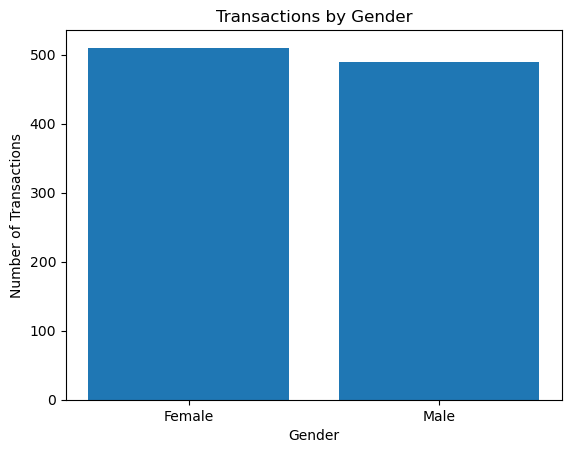

In [25]:
gender_count = df['Gender'].value_counts()

plt.figure()
plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Gender')
plt.show()


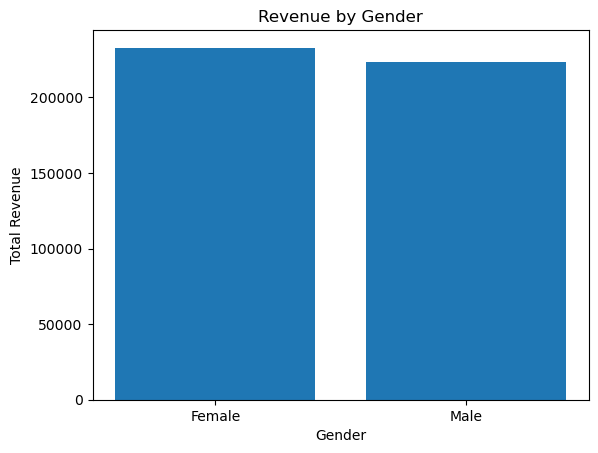

In [26]:
revenue_by_gender = df.groupby('Gender')['Total Amount'].sum().sort_values(ascending=False)
revenue_by_gender
plt.figure()
plt.bar(revenue_by_gender.index, revenue_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.title('Revenue by Gender')
plt.show()

In [27]:
revenue_by_age_group = (
    df.groupby('Age_Group')['Total Amount']
    .sum()
)
average_revenue_by_age_group = (
    df.groupby('Age_Group')['Total Amount'].sum() / df.groupby('Age_Group')['Total Amount'].count()
)
average_revenue_by_age_group


C:\Users\300\AppData\Local\Temp\ipykernel_16972\1539723836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Total Amount']
C:\Users\300\AppData\Local\Temp\ipykernel_16972\1539723836.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Total Amount'].sum() / df.groupby('Age_Group')['Total Amount'].count()


Age_Group
<18      534.047619
18–25    495.506757
26–35    480.390244
36–45    454.801980
46–55    439.694323
56–65    412.358974
Name: Total Amount, dtype: float64

In [28]:
revenue_by_age_group

Age_Group
<18       11215
18–25     73335
26–35     98480
36–45     91870
46–55    100690
56–65     80410
Name: Total Amount, dtype: int64

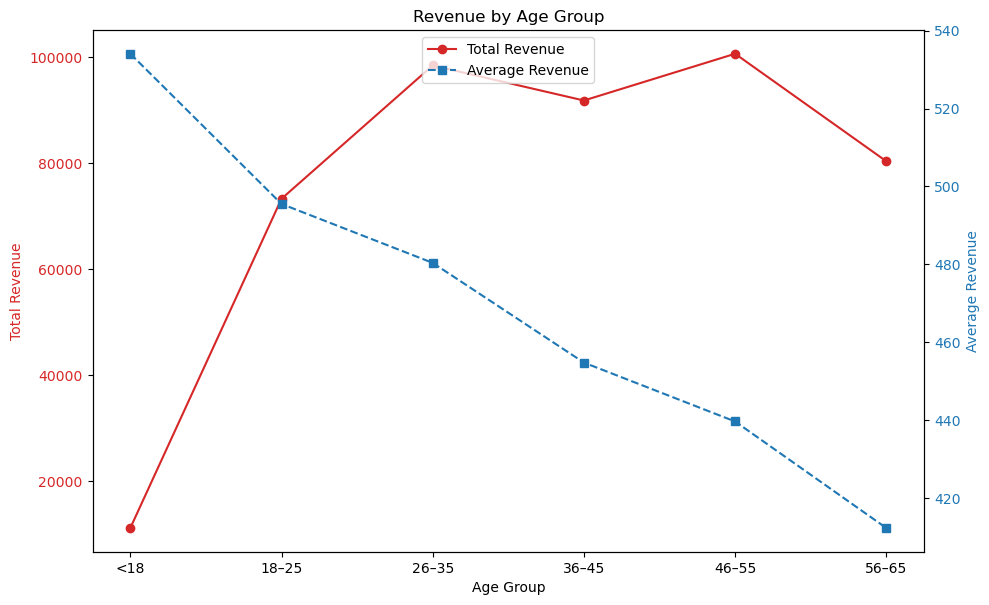

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
color1 = 'tab:red'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Revenue', color=color1)
ax1.plot(revenue_by_age_group.index.astype(str), revenue_by_age_group.values, color =color1, marker='o', label = 'Total Revenue')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Average Revenue', color=color2)
ax2.plot(average_revenue_by_age_group.index.astype(str), average_revenue_by_age_group.values, color=color2, marker='s', label = 'Average Revenue', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)    
fig.tight_layout()
plt.title('Revenue by Age Group')
lines = ax1.lines + ax2.lines
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')
plt.grid(True, axis='x', linestyle=':', alpha=0.5)
plt.show()

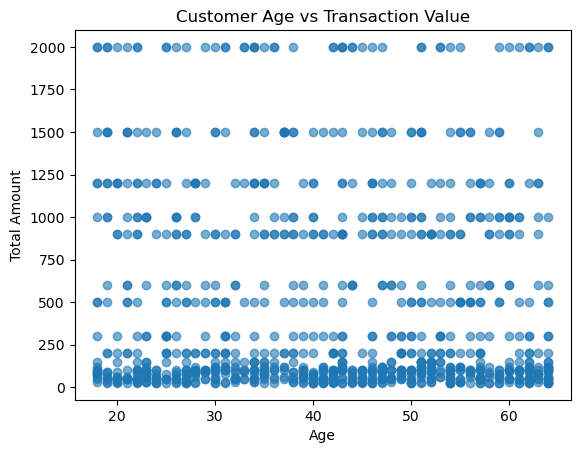

In [30]:
plt.figure()
plt.scatter(df['Age'], df['Total Amount'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Customer Age vs Transaction Value')
plt.show()


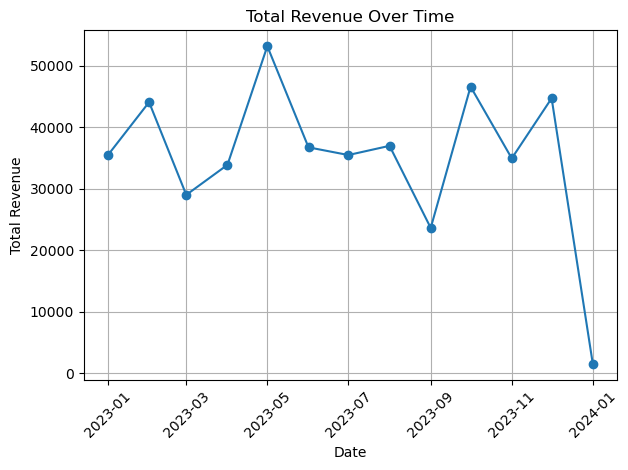

In [52]:
monthly_sales = (
    df.groupby(['Year', 'Month'])['Total Amount']
    .sum()
    .reset_index()
)

monthly_sales['Date'] = pd.to_datetime(
    monthly_sales[['Year', 'Month']].assign(DAY=1)
)

# total revenue plot (monthly)
plt.figure()
plt.plot(monthly_sales['Date'], monthly_sales['Total Amount'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


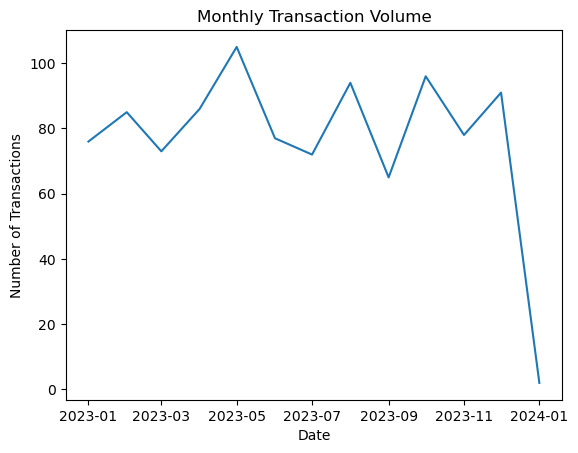

In [32]:
monthly_transactions = (
    df.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Transaction Count')
)

monthly_transactions['Date'] = pd.to_datetime(
    monthly_transactions[['Year', 'Month']].assign(DAY=1)
)

plt.figure()
plt.plot(monthly_transactions['Date'], monthly_transactions['Transaction Count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Volume')
plt.show()


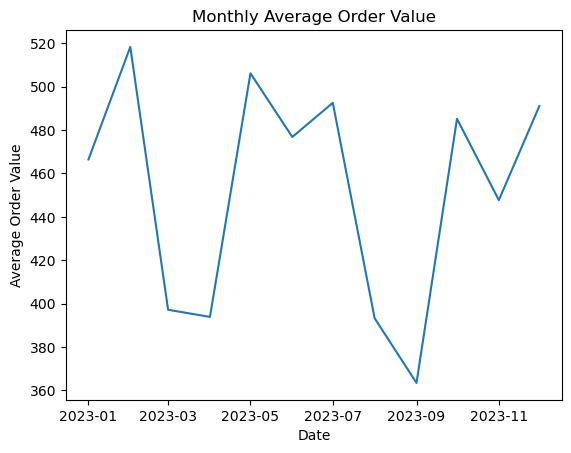

In [33]:
monthly_aov = (
    df.groupby(['Year', 'Month'])['Total Amount']
    .mean()
    .reset_index()
)

monthly_aov['Date'] = pd.to_datetime(
    monthly_aov[['Year', 'Month']].assign(DAY=1)
)
filtered_aov = monthly_aov[monthly_aov['Date'] < '2024-01-01'].sort_values('Date')
plt.figure()
plt.plot(filtered_aov['Date'], filtered_aov['Total Amount'])
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.title('Monthly Average Order Value')
plt.show()


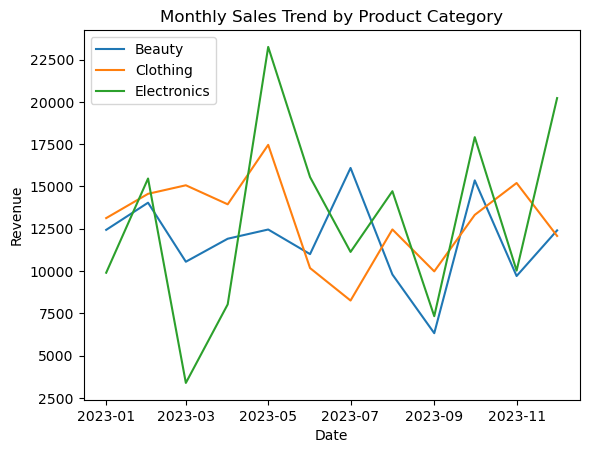

In [34]:
monthly_category_sales = (
    df.groupby(['Year', 'Month', 'Product Category'])['Total Amount']
    .sum()
    .reset_index()
)

monthly_category_sales['Date'] = pd.to_datetime(
    monthly_category_sales[['Year', 'Month']].assign(DAY=1)
)

plt.figure()
for category in monthly_category_sales['Product Category'].unique():
    data = monthly_category_sales[monthly_category_sales['Product Category'] == category]
    filtered = data[data['Date'] < '2024-01-01'].sort_values('Date')
    if filtered.empty:
        continue
    plt.plot(filtered['Date'], filtered['Total Amount'], label=category)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Sales Trend by Product Category')
plt.legend()
plt.show()


In [35]:
df. head()



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_Name,Age_Group,Calculated_Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November,26–35,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February,26–35,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January,46–55,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May,36–45,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May,26–35,100


In [36]:
#export df to csv
df.to_csv("C:/Users/300/Downloads/retail_sales_dataset_cleaned.csv", index=False)

In [42]:
last_month_revenue = df[df['Date'].dt.month == 12]['Total Amount'].sum()
last_month_revenue

np.int64(44690)

In [53]:
monthly_sales.head()

,Year,Month,Total Amount,Date
0,2023,1,35450,2023-01-01
1,2023,2,44060,2023-02-01
2,2023,3,28990,2023-03-01
3,2023,4,33870,2023-04-01
4,2023,5,53150,2023-05-01
